In [1]:
#기본 라이브러리 IMPORT 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

#### <span style="color:red"> **🎯 1. 이진 로지스틱 회귀(분류)** </span>

In [2]:
#로지스틱 회귀 결과를 파악하기 위해, 아래 최초 1회 실행
#pip install statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# pandas 라이브러리를 활용한 csv 파일 읽기 
df = pd.read_csv("customer_details.csv") # customer_details.csv

In [3]:
# 전처리
df.dropna(inplace=True)
df.isnull().sum()

# 숫자로 변환 
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Purchase Amount (USD)'] = pd.to_numeric(df['Purchase Amount (USD)'], errors='coerce')

# y도 숫자로 변환
df['Subscription Status'] = df['Subscription Status'].map({'Yes': 1, 'No': 0})

# 결측값 제거
df = df.dropna(subset=['Age', 'Purchase Amount (USD)', 'Subscription Status'])

# 범주형 이진형 변수인지 확인하기  
df['Subscription Status'].unique()

array([1, 0], dtype=int64)

In [4]:
# 범주형 이진형 변수인지 확인하기  
df['Subscription Status'].unique()

array([1, 0], dtype=int64)

In [5]:
# X, Y 설정 및 귀무가설, 대립가설 설정
# 귀무가설: 나이와 구매금액은 구독여부에 영향을 주지 않는다. 상관이 없다. 영향이 없다. 관련이 없다.
# 대립가설: 나이와 구매금액은 구독여부에 영향을 준다. 상관이 있다. 영향이 있다. 관련이 있다.

X = df[['Age', 'Purchase Amount (USD)']]        # 독립변수
y = df['Subscription Status']            # 종속변수 


In [6]:
# 훈련 데이터와 테스트 데이터 나누기 
# 훈련 데이터: 학습하고 그 로직을 모델에 저장하기 위한 데이터
# 테스트 데이터: 학습한 모델의 정확도를 확인하는 데이터 
# test_size=0.2 의미 >> 테스트 데이터셋: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 모델 생성 및 학습
# max_iter=1000 >> 학습을 반복하면서 그 정확도는 높이는데, 기본값은 100.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# 예측 및 성능평가
# 정확도: 약 71% 
y= model.predict(X_test)
y_pred = y.copy()
print("Accuracy:", accuracy_score(y_test, y_pred))

# 회귀계수 및 절편확인
print("계수:", model.coef_)
print("절편:", model.intercept_)

Accuracy: 0.7153846153846154
계수: [[0.00156691 0.00053243]]
절편: [-1.11444133]


In [9]:
#coef : 계수
#P>|z| : 각 변수의 p-value
#LLR p-value : 전체 모델 유의성(p-value) 여기서는 1임. 독립변수가 input 으로 들어가도 회귀식 성능이 좋아지지 않았다. 
import statsmodels.api as sm

X = df[['Age', 'Purchase Amount (USD)']]
y = df['Subscription Status']

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.589503
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     Subscription Status   No. Observations:                 3900
Model:                           Logit   Df Residuals:                     3898
Method:                            MLE   Df Model:                            1
Date:                 Fri, 12 Dec 2025   Pseudo R-squ.:                -0.01071
Time:                         10:52:39   Log-Likelihood:                -2299.1
converged:                        True   LL-Null:                       -2274.7
Covariance Type:             nonrobust   LLR p-value:                     1.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0113      0.002     -7.052      0.000      -0.014 

In [10]:
# 결과 확인 
# Precision(정밀도): 예측한 클래스 중 실제로 해당 클래스인 데이터의 비율
# Recall(재현율): 실제 클래스 중 예측한 클래스와 일치한 데이터의 비율
# F1-score: Precision과 Recall의 조화평균
# Support: 각 클래스의 실제 데이터 수
# 정답(y_test) 과 예측값(y_pred)에 대한 리포트 생성 
# accuracy = 0.71  
# 0 레이블: 구독no에 대한 예측지표 
# 1 레이블: 구독yes에 대한 예측지표 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.83       558
           1       0.00      0.00      0.00       222

    accuracy                           0.72       780
   macro avg       0.36      0.50      0.42       780
weighted avg       0.51      0.72      0.60       780



In [16]:
#성능 개선시키기
# 로지스틱 회귀는 predict_proba로 확률을 뽑아야 함(내 눈으로 확인하기 위함)
y_prob = model.predict_proba(X_test)[:, 1]  # class 1의 확률

# threshold 조정(기준점을 0.5에서 조정한다는 의미)
threshold = 0.262 #기준점 조정
y_pred_adj = (y_prob >= threshold).astype(int)

# 평가
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adj))

              precision    recall  f1-score   support

           0       0.72      0.24      0.36       558
           1       0.29      0.76      0.42       222

    accuracy                           0.39       780
   macro avg       0.50      0.50      0.39       780
weighted avg       0.59      0.39      0.38       780



#### <span style="color:red"> **🎯 2. knn(분류)** </span>

In [12]:
# 수질 데이터를 기반으로 수질 상태를 분류하기
# 수질 데이터를 기반으로 수질 상태를 분류하기
# is_safe 컬럼이 1이면 안전한 물을, 0이면 안전하지 않은 물을 의미합니다. 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [13]:
# 데이터셋 로드
df5 = pd.read_csv("waterQuality1.csv")

In [14]:
# 데이터 타입 확인 
df5.info()

#전처리
# 암모니아 컬럼에 '#NUM! 으로 기록된 값 제거 
df5['ammonia'].value_counts()['#NUM!']
df5 = df5[df5['ammonia'].str.contains('#NUM!') == False]

# 결측값 처리
df5.dropna(inplace=True)
#df5.isnull().sum()

#데이터 타입 변경 
df5['ammonia'] = pd.to_numeric(df5['ammonia'])
df5['is_safe'] = pd.to_numeric(df5['is_safe'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [15]:
# 독립변수(X)와 종속변수(y) 지정
columns = df5.columns
columns = [c for c in columns if c not in ['is_safe']]
# 예측하고싶은 값
# is_safe 컬럼이 1이면 안전한 물을, 0이면 안전하지 않은 물을 의미합니다. 
y = df5['is_safe'] 
# 예측에 사용할 값 
X = df5[columns]  


# KNN 알고리즘 활용을 위한 TEST 셋과 TRAIN 셋 분리
# 훈련데이터셋: 모델이 학습할 데이터셋
# 테스트데이터셋: 모델 성능을 확인할 데이터셋 
# 테스트데이터셋을 30% 로 지정 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5597, 20), (2399, 20), (5597,), (2399,))

In [16]:
# scale 
sc = StandardScaler()

# 적용시킬 데이터 준비
sc.fit(X_train)

# 훈련데이터셋과 테스트 데이터셋에 적용
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
# KNN알고리즘 훈련 데이터셋에 적용 
knn = KNeighborsClassifier()   
knnc = knn.fit(X_train,y_train)

# 테스트 데이터셋 예측 
y_pred_knnc = knnc.predict(X_test)
y_pred_knnc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
# 결과 확인 
# Precision(정밀도): 예측한 클래스 중 실제로 해당 클래스인 데이터의 비율
# Recall(재현율): 실제 클래스 중 예측한 클래스와 일치한 데이터의 비율
# F1-score: Precision과 Recall의 조화평균
# Support: 각 클래스의 실제 데이터 수
# 정답(y_test) 과 예측값(y_pred_knnc)에 대한 리포트 생성 
# accuracy = 0.86  
# 0 레이블: 안전하지 않은 물에 대한 예측지표 
# 1 레이블: 안전한 물에 대한 예측지표
# 현재 데이터셋의 경우, 데이터 불균형으로 인해 안전한 물에 대한 예측지표가 낮게 학습되었습니다. 
# 이렇게 데이터가 불균형을 이룰 때는 F1-score(precision 과 Recall 의 조화평균)을 보면 됩니다. :- ) 
# 그래도 1 레이블의 f1-score 는 0.17 입니다. 

print(classification_report(y_test, y_pred_knnc))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2091
           1       0.38      0.11      0.17       308

    accuracy                           0.86      2399
   macro avg       0.63      0.54      0.55      2399
weighted avg       0.82      0.86      0.83      2399



#### <span style="color:red"> **🎯 3. Decision Tree & Random Forest(분류)** </span>

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
# 데이터 불러오기
df = pd.read_csv("customer_details.csv")

#값 매핑
df["Subscription Status"] = df["Subscription Status"].map({"Yes": 1, "No": 0})

In [21]:
# 머신러닝에 사용할 컬럼/타깃 분리
X = df.drop(columns=["Subscription Status", "Customer ID"])
y = df["Subscription Status"]
# 원핫 인코딩 진행(범주형 변수를 원소 단위(0,1) 조합으로 바꿔줌)
X_encoded = pd.get_dummies(X, drop_first=True)

In [22]:
X_encoded

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,...,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,53,3.1,14,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,19,64,3.1,2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,50,73,3.1,23,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,21,90,3.5,49,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,45,49,2.7,31,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,28,4.2,32,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3896,52,49,4.5,41,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3897,46,33,2.9,24,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3898,44,77,3.8,24,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [23]:
# train / test 분리
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [24]:
# Decision TREE 적용 
dt = DecisionTreeClassifier(
    max_depth=4,       # 적당히 제한, 바꿔가면서 비교해 보세요
    random_state=42
)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [25]:
# Decision TREE 적용 
# 혼동행렬
# 예측과 실제데이터에 대한 결과표 
# confusion_matrix로 구현
# ㅁㅁ >>> TN(실제로NO, 예측도 NO -> NO 를 맞춤), FP(실제로는 NO, 예측은 YES -> 잘못 예측)
# ㅁㅁ >>> FN(실제로 YES, 예측은 NO -> 잘못 맞춤), TP(실제로 YES, 예측도 YES -> YES 를 맞춤)
confusion_matrix(y_test, y_pred_dt)

array([[438, 120],
       [ 13, 209]], dtype=int64)

In [26]:
# Decision TREE 적용 
# 결과 확인
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87       558
           1       0.64      0.94      0.76       222

    accuracy                           0.83       780
   macro avg       0.80      0.86      0.81       780
weighted avg       0.88      0.83      0.84       780



In [27]:
# RandomForest 적용
rf = RandomForestClassifier(
    n_estimators=200,  # 트리 개수, 바꿔가면서 비교해 보세요
    max_depth=None,    # 깊이는 제한하지 않고 알아서, 바꿔가면서 비교해 보세요
    random_state=42,
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [28]:
# RandomForest 적용
# 혼동행렬
# 예측과 실제데이터에 대한 결과표 
# confusion_matrix로 구현
# ㅁㅁ >>> TN(실제로NO, 예측도 NO -> NO 를 맞춤), FP(실제로는 NO, 예측은 YES -> 잘못 예측)
# ㅁㅁ >>> FN(실제로 YES, 예측은 NO -> 잘못 맞춤), TP(실제로 YES, 예측도 YES -> YES 를 맞춤)
confusion_matrix(y_test, y_pred_rf)

array([[432, 126],
       [ 18, 204]], dtype=int64)

In [29]:
# RandomForest 적용
# 결과 확인
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       558
           1       0.62      0.92      0.74       222

    accuracy                           0.82       780
   macro avg       0.79      0.85      0.80       780
weighted avg       0.86      0.82      0.82       780



#### <span style="color:red"> **🎯 4. XGBoost, LightGBM(분류)** </span>

In [30]:
# 최초 1회 설치 
#!pip install xgboost lightgbm

In [31]:
#데이터 불러오기
df = pd.read_csv("customer_details.csv") 

# 값 매핑
df["Subscription Status"] = df["Subscription Status"].map({"Yes": 1, "No": 0})

# 고유값 제거
df = df.drop(columns=["Customer ID"])

# 범주형 컬럼들 Label Encoding (컬럼이 가지고 있는 범주개수가 많으면 주의,
# 라벨인코딩 특성상 속성이 아닌 바로 숫자 매핑 -> 머신러닝시 이를 크기로 오인하여 결과가 잘못될 수 있음)
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include="object").columns

le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le   

# 피처/타깃 분리
X = df.drop(columns=["Subscription Status"])
y = df["Subscription Status"]

# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
# xgboost 모델적용 
from xgboost import XGBClassifier

# XGBoost 모델 정의
xgb_clf = XGBClassifier(
    n_estimators=200,      # 트리 수
    learning_rate=0.1,    # 한 번에 얼마나 보정할지 
    max_depth=3,          # 트리 깊이 (복잡도)
    random_state=42,
)

# 학습
xgb_clf.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_clf.predict(X_test)

# 성능평가
accuracy_score(y_test, y_pred_xgb)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       569
           1       0.67      0.81      0.73       211

    accuracy                           0.84       780
   macro avg       0.79      0.83      0.81       780
weighted avg       0.85      0.84      0.84       780



In [33]:
from lightgbm import LGBMClassifier

# LightGBM 모델 정의
lgbm_clf = LGBMClassifier(
    n_estimators=200,     # 트리 수
    learning_rate=0.1,   # 학습률
    max_depth=-1,         # -1이면 깊이 제한 없음 (과적합시 줄이기)
    num_leaves=30,      # 리프(leaf) 개수--> 복잡도를 의미합니다. 가지치기를 많이한다는 의미
    random_state=42
)

# 학습
lgbm_clf.fit(X_train, y_train)

# 예측
y_pred_lgbm = lgbm_clf.predict(X_test)

# 성능평가
accuracy_score(y_test, y_pred_lgbm)
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 842, number of negative: 2278
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 3120, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269872 -> initscore=-0.995273
[LightGBM] [Info] Start training from score -0.995273
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       569
           1       0.65      0.74      0.69       211

    accuracy                           0.82       780
   macro avg       0.78      0.80      0.79       780
weighted avg       0.83      0.82      0.83       780



# 여러분 너무 즐겁죠?

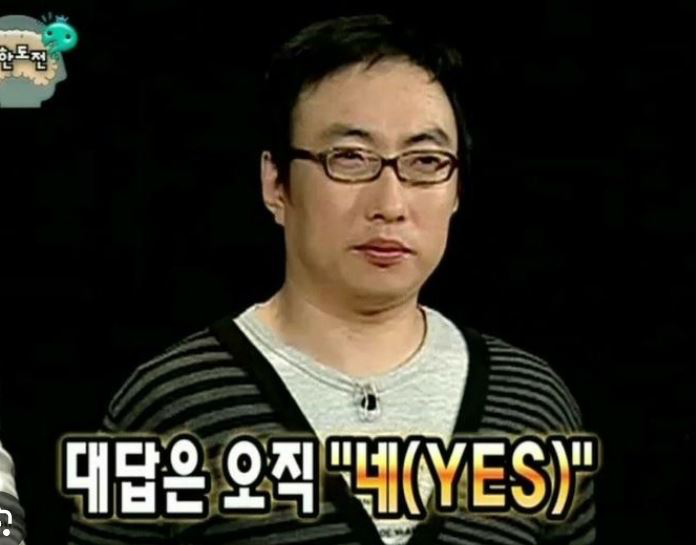

In [34]:
from PIL import Image
Image.open('네명수.jpg')